In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apartments=[f"Apt_{i}" for i in range(1,21)]

In [3]:
dates=pd.date_range(start='2025-07-01', periods=30, freq='D')

In [4]:
date={
    "Date":np.tile(dates,len(apartments)),
    "Appartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}


In [5]:
df=pd.DataFrame(date)

In [6]:
df

,Date,Appartment,Electricity_usage
0,2025-07-01,Apt_1,30.067062
1,2025-07-02,Apt_1,25.428838
2,2025-07-03,Apt_1,19.992592
3,2025-07-04,Apt_1,30.482903
4,2025-07-05,Apt_1,17.051367
...,...,...,...
595,2025-07-26,Apt_20,20.054094
596,2025-07-27,Apt_20,20.388050
597,2025-07-28,Apt_20,19.342210
598,2025-07-29,Apt_20,26.270927


In [7]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)
df

,Date,Appartment,Electricity_usage
0,2025-07-01,Apt_1,30.07
1,2025-07-02,Apt_1,25.43
2,2025-07-03,Apt_1,19.99
3,2025-07-04,Apt_1,30.48
4,2025-07-05,Apt_1,17.05
...,...,...,...
595,2025-07-26,Apt_20,20.05
596,2025-07-27,Apt_20,20.39
597,2025-07-28,Apt_20,19.34
598,2025-07-29,Apt_20,26.27


In [8]:
df.isnull().sum()

Date                 0
Appartment           0
Electricity_usage    0
dtype: int64

In [9]:
df.dtypes

Date                 datetime64[ns]
Appartment                   object
Electricity_usage           float64
dtype: object

In [10]:
df.head()

,Date,Appartment,Electricity_usage
0,2025-07-01,Apt_1,30.07
1,2025-07-02,Apt_1,25.43
2,2025-07-03,Apt_1,19.99
3,2025-07-04,Apt_1,30.48
4,2025-07-05,Apt_1,17.05


In [11]:
df.tail()

,Date,Appartment,Electricity_usage
595,2025-07-26,Apt_20,20.05
596,2025-07-27,Apt_20,20.39
597,2025-07-28,Apt_20,19.34
598,2025-07-29,Apt_20,26.27
599,2025-07-30,Apt_20,21.27


In [12]:
df.shape

(600, 3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Appartment         600 non-null    object        
 2   Electricity_usage  600 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.2+ KB


In [14]:
usage_per_apartment=df.groupby("Appartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)

Appartment
Apt_3     676.32
Apt_5     651.04
Apt_16    638.46
Apt_20    632.07
Apt_14    631.40
Apt_6     626.19
Apt_11    608.46
Apt_2     607.65
Apt_8     606.36
Apt_13    601.14
Apt_1     599.35
Apt_18    598.50
Apt_9     593.17
Apt_17    586.54
Apt_15    583.91
Apt_12    582.95
Apt_19    578.39
Apt_4     577.58
Apt_10    573.24
Apt_7     536.82
Name: Electricity_usage, dtype: float64


In [15]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    19.6930
2025-07-02    21.8420
2025-07-03    20.3670
2025-07-04    20.8690
2025-07-05    19.7315
Name: Electricity_usage, dtype: float64


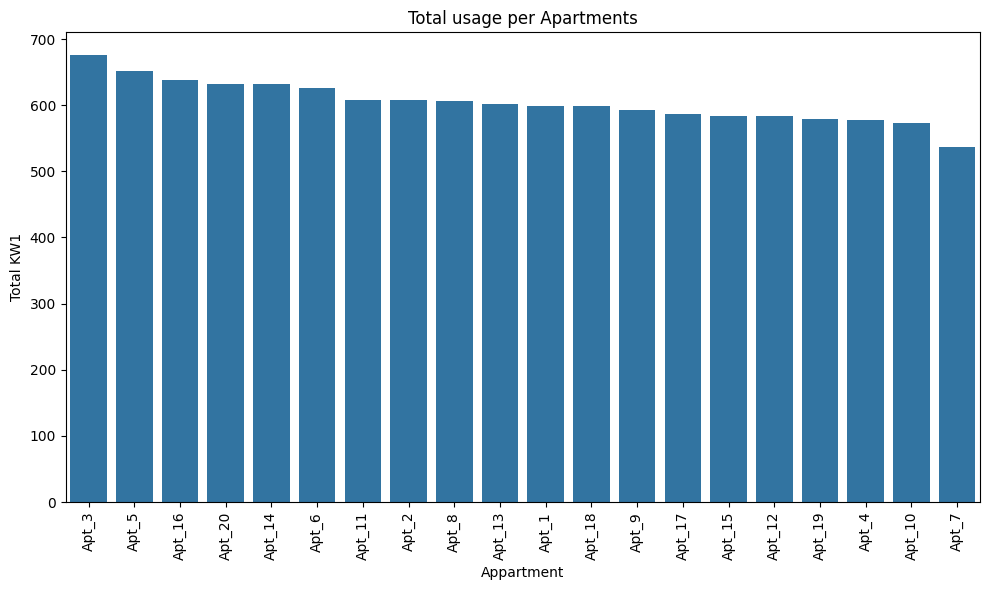

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y= usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Appartment")
plt.ylabel("Total KW1")
plt.tight_layout()
plt.show()

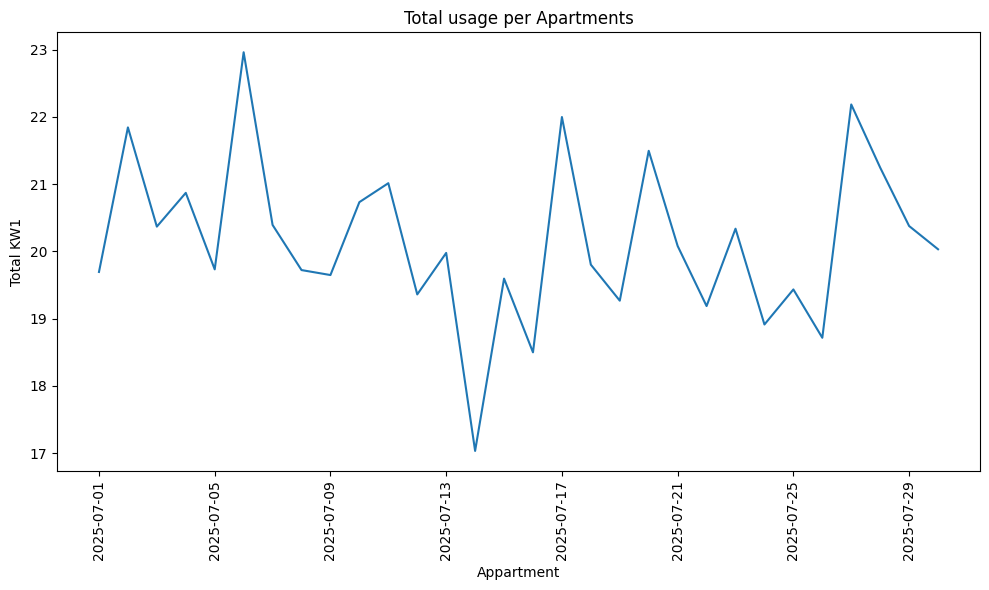

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Appartment")
plt.ylabel("Total KW1")
plt.tight_layout()
plt.show()

In [19]:
thresholds=df["Electricity_usage"].mean()+2 *df["Electricity_usage"].std()
df["High_usage_flag"]=df["Electricity_usage"] > thresholds
print(df[df["High_usage_flag"] == True].head())

         Date Appartment  Electricity_usage  High_usage_flag
38 2025-07-09      Apt_2              31.09             True
47 2025-07-18      Apt_2              32.70             True
69 2025-07-10      Apt_3              31.15             True
87 2025-07-28      Apt_3              32.41             True
88 2025-07-29      Apt_3              30.85             True
